In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import StandardScaler

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
X = pd.read_csv('data.csv', sep=';',index_col='id')

In [12]:
X.head()

,age,exp,damage,salary
id,,,,
6-LLJEH,20,1,263,716693
2-GLHFG,74,51,107,274393
6-FJFKL,27,1,165,723841
4-KJEJL,24,6,348,139419
5-JFFGH,26,3,286,650003


In [5]:
X_scale = StandardScaler().fit_transform(X)
db = DBSCAN(eps=0.48, min_samples=8).fit(X_scale)
labels = db.labels_

In [8]:
model = PCA(n_components=2,svd_solver='full')
model.fit(X_scale)
data_2d_pca = model.transform(X_scale)

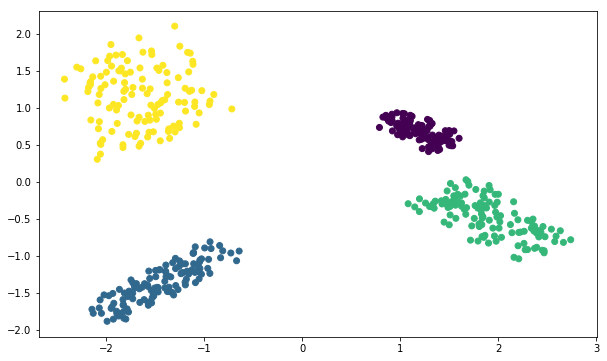

In [9]:
pylab.figure(figsize = (10, 6))
pylab.scatter(data_2d_pca[:, 0], data_2d_pca[:, 1], c = labels)

In [11]:
for i in xrange(len(pd.Series(db.labels_).unique())):
    print 'Кластер', i, 'Доля от выборки', '%.2f'% (100.*len(X[db.labels_==i])/len(X)), '%'
    print X[labels==i].describe().loc[u'mean',:]
    print '_______________'

Кластер 0 Доля от выборки 25.00 %
age           24.504132
exp            2.586777
damage       203.024793
salary    700447.280992
Name: mean, dtype: float64
_______________
Кластер 1 Доля от выборки 25.00 %
age           69.851240
exp           45.826446
damage       152.380165
salary    242958.446281
Name: mean, dtype: float64
_______________
Кластер 2 Доля от выборки 25.00 %
age           30.107438
exp            7.322314
damage       487.140496
salary    149461.619835
Name: mean, dtype: float64
_______________
Кластер 3 Доля от выборки 25.00 %
age       5.681818e+01
exp       2.993388e+01
damage    6.575207e+01
salary    2.978736e+06
Name: mean, dtype: float64
_______________


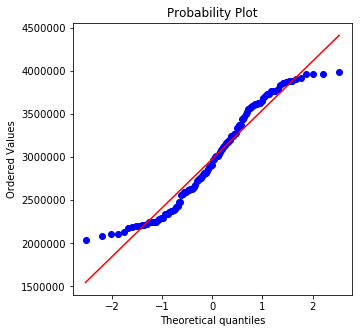

In [37]:
plt.figure(figsize(5,5))
sc.stats.probplot(X[labels==i]['salary'], dist='norm', plot=pylab)
pylab.show()

По  Q-Q  графику видно, что распределение не нормальное.
Хвосты нормального распределения тяжелее. Но распределение симметричное.

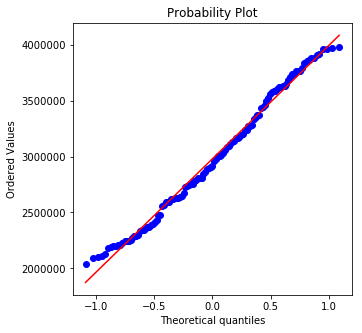

In [69]:
plt.figure(figsize(5,5))
sc.stats.probplot(X[labels==i]['salary'], dist=sc.stats.gennorm, sparams=(7), plot=pylab)
pylab.show()

Будем считать, что я не знаю распределения,
применим ранговые критерии для разности средних.
Выясним отличаются ли статистически значимо средние значения кажого из признаков в каждой и групп (кластеров).

### Ранговый критерий Манна-Уитни

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [70]:
import itertools

In [78]:
for feature in  X.columns.values:
    print '***************'
    print feature
    print '***************'
    for i,j in itertools.combinations(xrange(4),2):
        statistic, p_value = sc.stats.mannwhitneyu(X[labels==i][feature], X[labels==j][feature])
        if p_value >0.05:
            print i,j, p_value 
            print '_______________'


***************
age
***************
***************
exp
***************
***************
damage
***************
***************
salary
***************


Все гипотезы о равенсве средних отвергаются . 